In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

pd.set_option("display.max_colwidth", 200)
plt.style.use("seaborn-v0_8")


In [2]:
DATA_PATH = "/home/sherin/Image_Captioning/eda_project/data/main_entities_dataframe.csv"

if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(f"File not found: {DATA_PATH}")

df = pd.read_csv(DATA_PATH)
# Remove helper/source columns if present
if "_source_file" in df.columns:
    df = df.drop(columns=["_source_file"], errors="ignore")
print("Shape:", df.shape)


/tmp/ipykernel_13276/2265166655.py:6: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(DATA_PATH)


Shape: (378341, 9)


In [3]:
df.describe()

,title,group,product,entities,image_url,random_key,brand,persian_name,gender
count,378341,378336,378341,378341,378341,378341,312329,268874,43998
unique,338479,1795,55024,269657,362518,368101,22139,245998,30
top,محصولات مرتبط,نامشخص,پیراهن,[],https://image.torob.com/base/images/HB/t4/HBt4v2qhEaP_Hhx2.jpg,07a5b361-c66e-4301-a25b-a770baa86557,نامشخص,تیشرت زنانه mango,مردانه
freq,122,173925,20711,7251,266,2,149322,117,22995


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378341 entries, 0 to 378340
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         378341 non-null  object
 1   group         378336 non-null  object
 2   product       378341 non-null  object
 3   entities      378341 non-null  object
 4   image_url     378341 non-null  object
 5   random_key    378341 non-null  object
 6   brand         312329 non-null  object
 7   persian_name  268874 non-null  object
 8   gender        43998 non-null   object
dtypes: object(9)
memory usage: 26.0+ MB


In [5]:
df.head()

,title,group,product,entities,image_url,random_key,brand,persian_name,gender
0,اتمام موجودی ست دونفره میترا- ست زوج-ست کاپل- مانتو پیچازی- شلوار مردانه-ست زن و شوهر-ست خانم و آقا -تیپ بروز,زنانه و مردانه,ست دونفره میترا,"[{'name': 'نوع کلی', 'values': ['ست دونفره', 'ست زوج', 'ست کاپل', 'ست زن و شوهر', 'ست خانم و آقا']}, {'name': 'نوع پوشاک', 'values': ['مانتو', 'شلوار']}, {'name': 'طرح', 'values': ['پیچازی']}]",https://image.torob.com/base/images/U2/i7/U2i7anFx6PgF_GdL.jpg,da9f7dcb-9c88-4592-9a95-f2f838b24bd6,NaN,NaN,NaN
1,تیشرت ست تو مرا گنج جهانی,نامشخص,تیشرت ست,"[{'name': 'نوع پوشاک', 'values': ['تیشرت']}, {'name': 'طرح', 'values': ['تو مرا گنج جهانی']}]",https://image.torob.com/base/images/Gj/lJ/GjlJ6IPv7JV7HmFY.webp,2869cf74-5654-4b05-9c50-4fe9e364bd6f,NaN,NaN,NaN
2,بلوز شلوار گلدوزی تامی مردانه,مردانه,بلوز شلوار,"[{'name': 'نوع پوشاک', 'values': ['بلوز شلوار']}, {'name': 'ویژگی ها', 'values': ['گلدوزی']}, {'name': 'برند', 'values': ['تامی']}]",https://image.torob.com/base/images/Dr/vK/DrvKb-tZmq6T8GZf.jpg,a44ce944-5fa4-484f-b57f-70dc2e2e9488,NaN,NaN,NaN
3,ست بلوز و شلوار قلب بی نهایت,نامشخص,ست بلوز و شلوار,"[{'name': 'نوع پوشاک', 'values': ['ست بلوز و شلوار']}, {'name': 'طرح', 'values': ['قلب بی نهایت']}]",https://image.torob.com/base/images/sg/fS/sgfS-Z0uRJo3gJM2.jpg,f759ce7b-2efe-4d8d-9397-05dcb7aa97a7,NaN,NaN,NaN
4,نیم ست شنی کد 152200113,نامشخص,نیم ست,"[{'name': 'نوع پوشاک', 'values': ['نیم ست']}]",https://image.torob.com/base/images/A-/Xf/A-Xf1IhgP8MP8wPU.jpg,4eba4403-33cd-4b2d-8d15-7b94348a55ce,NaN,NaN,NaN


In [6]:
pd.options.display.max_colwidth = 200
pd.options.mode.use_inf_as_na = True
plt.style.use("seaborn-v0_8")

# Reuse existing df if present; otherwise load from CSV path used earlier
if 'df' not in globals():
    DATA_PATH = "/home/sherin/Image_Captioning/eda_project/data/main_entities_dataframe.csv"
    if not os.path.exists(DATA_PATH):
        raise FileNotFoundError(f"File not found: {DATA_PATH}")
    df = pd.read_csv(DATA_PATH, low_memory=False)

print("Data shape:", df.shape)


Data shape: (378341, 9)


/tmp/ipykernel_13276/1400744919.py:2: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True


In [7]:
# FULL DATASET: Top value counts for categorical columns
cat_cols_full = [c for c in ['group', 'product', 'brand', 'gender'] if c in df.columns]
for c in cat_cols_full:
    display(pd.DataFrame(df[c].fillna('NA').value_counts().head(30)).rename(columns={c: 'count'}))


,count
group,
نامشخص,173925
زنانه,86110
مردانه,81524
دخترانه,11551
پسرانه,4121
بچگانه,4102
زنانه و دخترانه,2067
مردانه و زنانه,1979
مردانه زنانه,942


,count
product,
پیراهن,20711
کفش,10022
تیشرت,7666
ساعت مچی,6272
شلوار,5699
جاکلیدی,5263
مانتو,5065
کاپشن,4747
سویشرت,4414


,count
brand,
نامشخص,149322
NA,66012
خندالو,20928
ال سی وایکیکی,4516
زارا,1330
کوتون,1259
اسمارا,1179
السی وایکیکی,1012
آی ویش,901


,count
gender,
NA,334343
مردانه,22995
زنانه,16166
یونیسکس,2129
نامشخص,1857
پسرانه,595
دخترانه,170
زنانه و دخترانه,19
دخترانه و زنانه,15


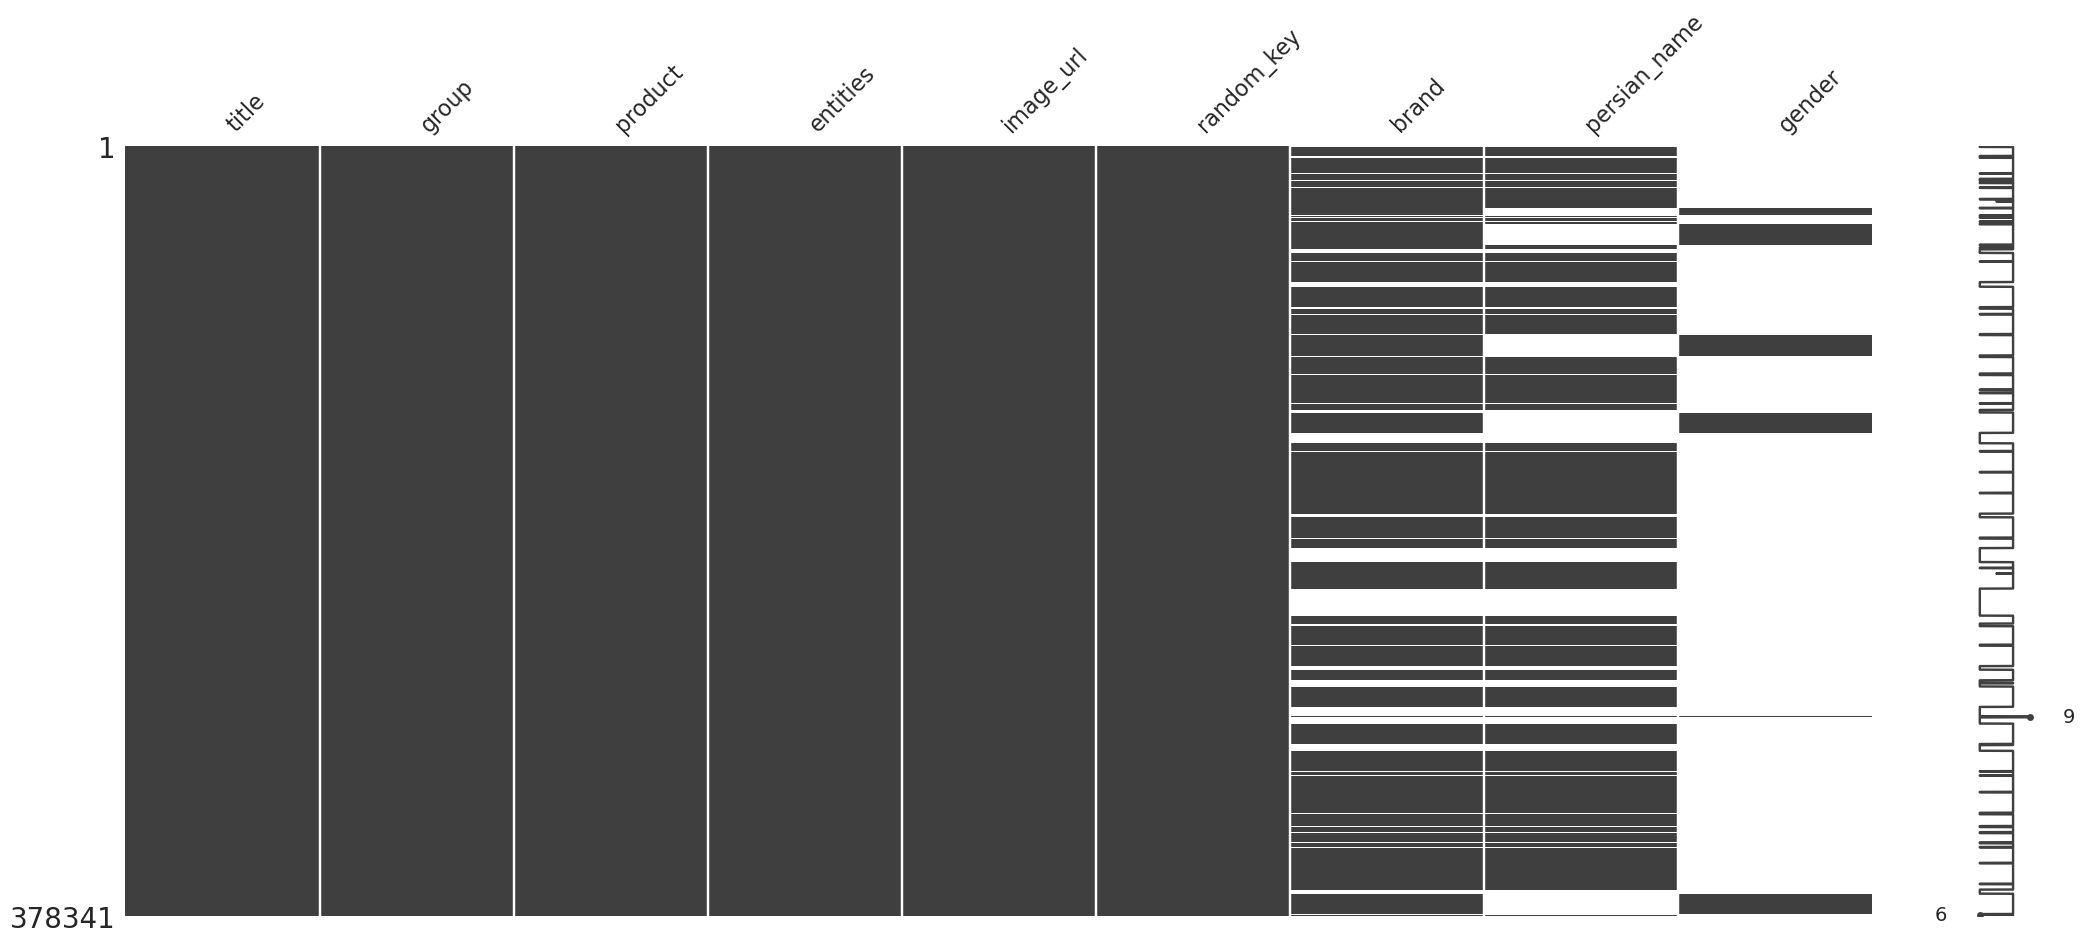

In [8]:
# Investigate missing values in data
msno.matrix(df);

In [9]:
df.isnull().sum()

title                0
group                5
product              0
entities             0
image_url            0
random_key           0
brand            66012
persian_name    109467
gender          334343
dtype: int64

In [10]:
df.dtypes

title           object
group           object
product         object
entities        object
image_url       object
random_key      object
brand           object
persian_name    object
gender          object
dtype: object

In [11]:
for col in df.columns:
    print(col, df[col].nunique())


title 338479
group 1795
product 55024
entities 269657
image_url 362518
random_key 368101
brand 22139
persian_name 245998
gender 30


In [12]:
df.isna().sum().sort_values(ascending=False)


gender          334343
persian_name    109467
brand            66012
group                5
title                0
image_url            0
entities             0
product              0
random_key           0
dtype: int64

In [13]:
df.duplicated().sum()

10240

In [14]:
df.drop_duplicates(inplace=True)


In [15]:
%pip install arabic-reshaper python-bidi

Note: you may need to restart the kernel to use updated packages.


In [16]:
# Persian (Farsi) text rendering setup: font + shaping (bidi)
import matplotlib as mpl
from matplotlib import font_manager as fm

# Try to enable Arabic/Persian shaping
try:
    import arabic_reshaper
    from bidi.algorithm import get_display
    def fa(text):
        if text is None:
            return ""
        text = str(text)
        return get_display(arabic_reshaper.reshape(text))
    # RTL helpers
    ALM = "\u061C"  # Arabic Letter Mark to keep numbers/parentheses in RTL context
    def fa_rtl(text):
        t = fa(text)
        return "\u202B" + t + "\u202C"  # RLE ... PDF
except Exception:
    # Fallback: no shaping available
    def fa(text):
        return "" if text is None else str(text)
    ALM = ""
    def fa_rtl(text):
        return "" if text is None else str(text)

# Prefer fonts that support Persian glyphs
preferred_fonts = [
    "Vazirmatn",  # common OSS Persian font
    "Vazir",
    "Noto Naskh Arabic",
    "Noto Sans Arabic",
    "DejaVu Sans",  # bundled with matplotlib, partial Arabic support
]

# Set font fallback list without raising if some not installed
mpl.rcParams["font.family"] = "sans-serif"
mpl.rcParams["font.sans-serif"] = preferred_fonts + mpl.rcParams.get("font.sans-serif", [])

# Ensure minus sign displays with non-Latin fonts
mpl.rcParams["axes.unicode_minus"] = False

# (Optional) quick check which font will render
_ = fm.findfont(mpl.rcParams["font.sans-serif"][0], fallback_to_default=True)
print("Using font family:", mpl.rcParams["font.sans-serif"][:5])
print("Unicode minus off:", mpl.rcParams["axes.unicode_minus"])


findfont: Font family ['Vazirmatn'] not found. Falling back to DejaVu Sans.


Using font family: ['Vazirmatn', 'Vazir', 'Noto Naskh Arabic', 'Noto Sans Arabic', 'DejaVu Sans']
Unicode minus off: False


/tmp/ipykernel_13276/814874136.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([fa(y) for y in _top_groups.index])


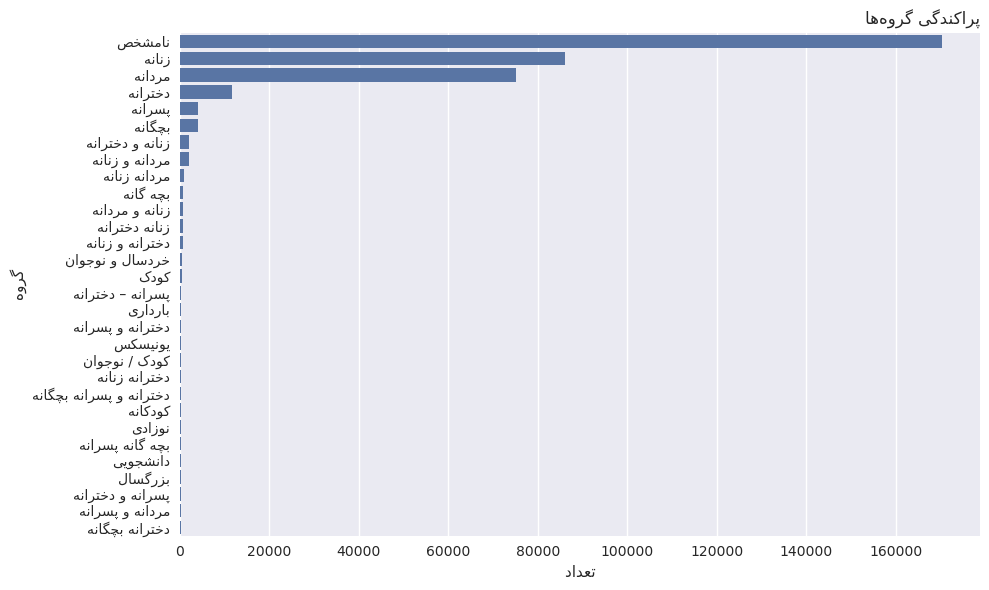

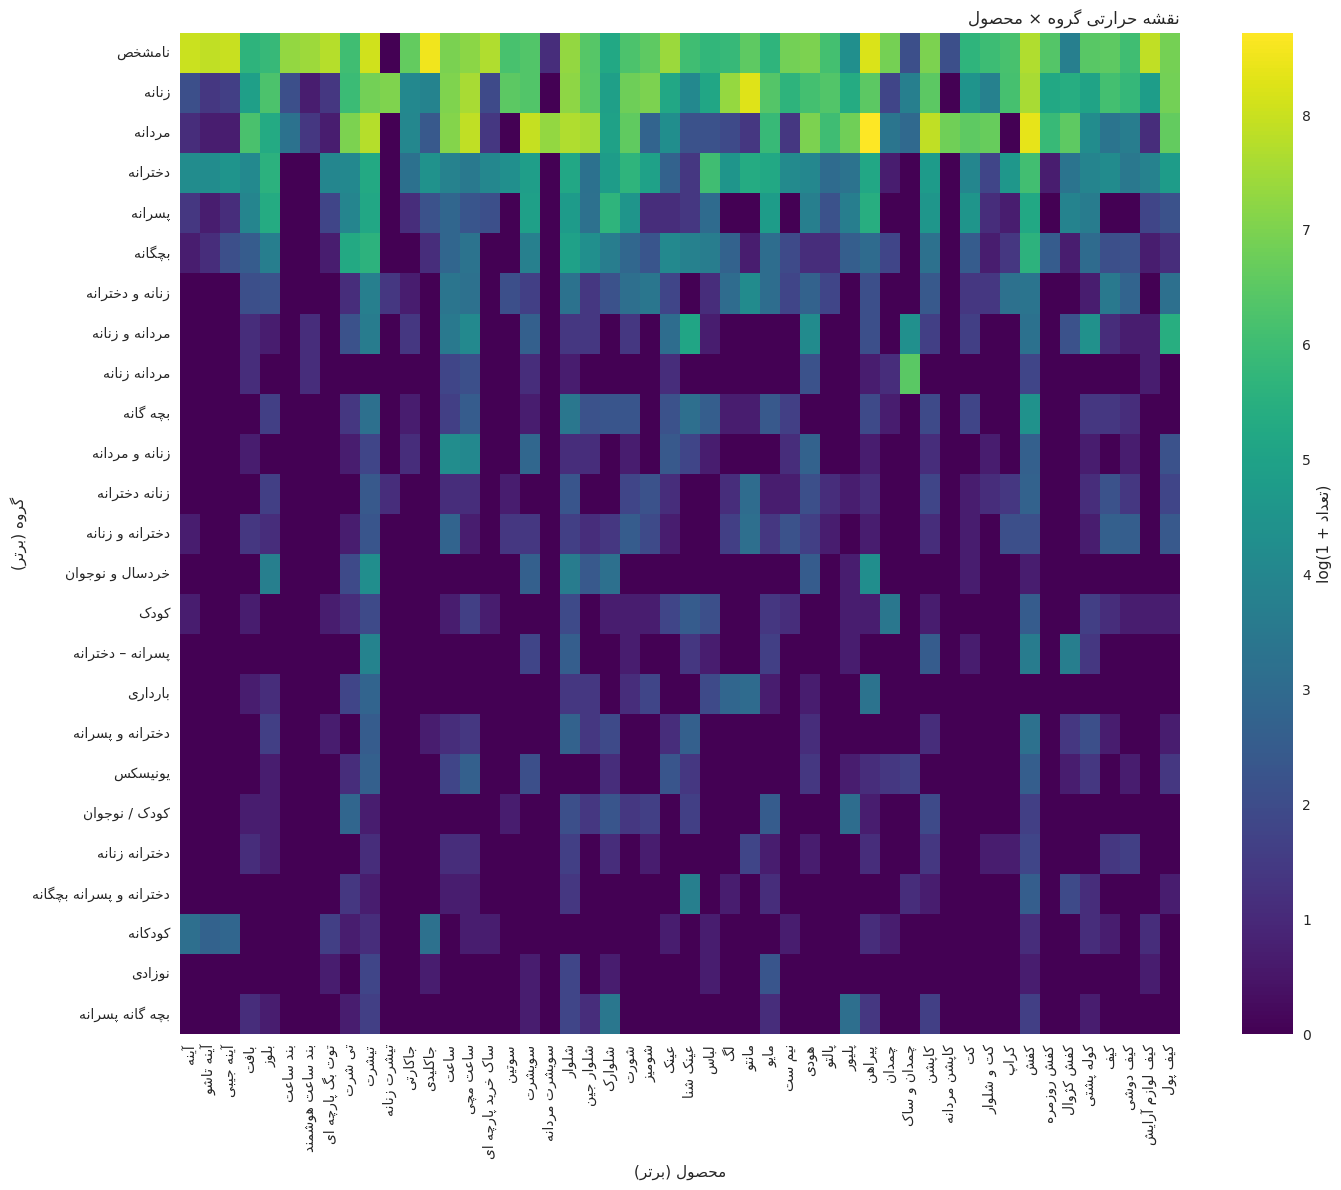

In [17]:
required_cols = {"group", "product"}
missing = required_cols - set(df.columns)
if missing:
    raise KeyError(f"Missing required columns: {sorted(missing)}")

# Prepare data
_df = df[["group", "product"]].copy()
_df = _df.dropna(subset=["group", "product"]).astype({"group": str, "product": str})

# Helper to apply Persian shaping if available
try:
    fa  # defined in the setup cell
except NameError:
    def fa(text):
        return "" if text is None else str(text)

# 1) Top groups (count)
fig, ax = plt.subplots(figsize=(10, 6))
_top_groups = _df["group"].value_counts().head(30)
sns.barplot(x=_top_groups.values, y=_top_groups.index, ax=ax, color="#4c72b0")
ax.set_yticklabels([fa(y) for y in _top_groups.index])
ax.set_title(fa_rtl("پراکندگی گروه‌ها"), loc="right")
ax.set_xlabel(fa_rtl("تعداد"))
ax.set_ylabel(fa_rtl("گروه"))
plt.tight_layout()
plt.show()

# 2) Heatmap of counts for top groups vs top products
# Select most frequent groups and products to keep the heatmap readable
num_groups = 25
num_products = 50

top_groups = _df["group"].value_counts().head(num_groups).index
top_products = _df["product"].value_counts().head(num_products).index

_ct = (
    _df[_df["group"].isin(top_groups) & _df["product"].isin(top_products)]
    .groupby(["group", "product"]).size()
    .unstack(fill_value=0)
    .loc[top_groups]  # keep order of groups
)

# Log-scale transform for better contrast
_ct_log = np.log1p(_ct)

fig, ax = plt.subplots(figsize=(min(20, 2 + 0.25 * len(top_products)), 0.4 * len(top_groups) + 2))
sns.heatmap(_ct_log.rename(index=fa, columns=fa), cmap="viridis", ax=ax, cbar_kws={"label": fa_rtl("log(1 + تعداد)")})
ax.set_title(fa_rtl("نقشه حرارتی گروه × محصول"), loc="right")
ax.set_xlabel(fa_rtl("محصول (برتر)"))
ax.set_ylabel(fa_rtl("گروه (برتر)"))
plt.tight_layout()
plt.show()

# 3) For each of the top 10 groups, list top 10 products (as a compact table)
# Keep RAW values; show a shaped copy only for display
summary_rows = []
for g in list(top_groups)[:10]:
    vc = _df.loc[_df["group"] == g, "product"].value_counts().head(10)
    summary_rows.append({
        "group": g,  # raw
        "top_products": ", ".join([f"{p} ({c})" for p, c in vc.items()])  # raw
    })

_summary_df_raw = pd.DataFrame(summary_rows)
try:
    _summary_df_render = _summary_df_raw.copy()
    _summary_df_render["group"] = _summary_df_render["group"].map(fa)
    _summary_df_render["top_products"] = _summary_df_render["top_products"].map(fa)
    styled = (
        _summary_df_render.style
        .set_table_styles([
            {"selector": "th", "props": [("direction", "rtl"), ("text-align", "right")]},
            {"selector": "td", "props": [("direction", "rtl"), ("text-align", "right")]},
            {"selector": "table", "props": [("direction", "rtl"), ("text-align", "right")]},
        ])
        .set_properties(**{"direction": "rtl", "text-align": "right"})
    )
    styled
except Exception:
    _summary_df_raw


In [18]:
_summary_df_raw

,group,top_products
0,نامشخص,"جاکلیدی (5074), پیراهن (3759), تیشرت (3261), آینه (2991), آینه جیبی (2896), کیف لوازم آرایش (2680), آینه تاشو (2679), توت بگ پارچه ای (2290), کفش (2187), ساک خرید پارچه ای (2165)"
1,زنانه,"مانتو (3941), کفش (1937), ساعت مچی (1927), لگ (1530), شلوار (1369), تیشرت زنانه (1141), ساعت (1109), شومیز (1093), تیشرت (965), کیف پول (954)"
2,مردانه,"پیراهن (6073), کفش (4424), سویشرت (2853), ساعت مچی (2639), کاپشن (2632), تیشرت (2283), شلوار (2123), شلوار جین (1890), سویشرت مردانه (1495), ساعت (1196)"
3,دخترانه,"کفش (435), لباس (418), شورت (284), دامن (283), بلوز (262), مانتو (208), تیشرت (191), مایو (182), پیراهن (179), شلوار (176)"
4,پسرانه,"شلوارک (292), شورت و شلوارک (257), پیراهن (234), بلوز (208), کفش (184), تیشرت (176), سویشرت (136), مایو (120), شلوار (114), کاپشن (95)"
5,بچگانه,"تیشرت (269), کفش (269), تی شرت (188), تیشرت بچگانه (155), تی شرت آستین کوتاه بچگانه (151), شلوار (142), تی شرت بچگانه (96), تی شرت آستین کوتاه (76), شلوار جین (72), عینک (59)"
6,زنانه و دخترانه,"مانتو (64), تیشرت (40), ست کیف و روسری (34), کیف (33), بلوز بافت (33), شومیز (30), ساعت (29), کفش (28), شلوار (26), ساعت مچی (24)"
7,مردانه و زنانه,"کیف پول (238), عینک شنا (166), کوله پشتی (79), چمدان و ساک (75), دورس (69), هودی (64), ساعت مچی (59), تیشرت (36), ساعت (33), کیف پول چرمی (30)"
8,مردانه زنانه,"چمدان و ساک (660), چمدان و ساک مسافرتی (24), کفش و بوت موتورسیکلت (18), چمدان و ساک پلی پروپیلن (16), هودی (8), چمدان و ساک پارچه ای (8), چمدان و ساک ست (7), ساعت مچی (7), کیف پورتفولیو و کلچ (7),..."
9,بچه گانه,"کفش (82), شلوار (31), تیشرت (23), عینک شنا (22), لباس (12), ساعت مچی (11), مایو (10), شلوار لی (9), شلوارک (9), شورت (9)"


In [19]:
SPLIT_PATTERN = r'[\,\s/\\"]+|(?<=\s)و(?=\s)'

GROUP_MAPPING = {
    # --- زنانه ---
    "زن": "زنانه", "زنانه": "زنانه", "خانم": "زنانه", "خانمها": "زنانه", "خانم‌ها": "زنانه",
    "بانوان": "زنانه", "خانوم": "زنانه", "خانومها": "زنانه", "مونث": "زنانه",
    "دختر": "زنانه", "دخترانه": "زنانه", "دخترونه": "زنانه", "دختربچه": "زنانه", "دختران": "زنانه",
    # --- مردانه ---
    "مرد": "مردانه", "مردانه": "مردانه", "آقا": "مردانه", "آقایان": "مردانه", "آقايان": "مردانه",
    "مذکر": "مردانه", "مردونه": "مردانه", "پسر": "مردانه", "پسرانه": "مردانه", "پسرونه": "مردانه",
    "پسربچه": "مردانه", "پسران": "مردانه",
    # --- بچگانه ---
    "بچه": "بچگانه", "بچگانه": "بچگانه", "کودک": "بچگانه", "کودکانه": "بچگانه", "کودکان": "بچگانه",
    "کیذر": "بچگانه", "کیدز": "بچگانه", "خردسال": "بچگانه",
    # --- نوزادی ---
    "نوزاد": "نوزادی", "نوزادی": "نوزادی", "بیبی": "نوزادی", "baby": "نوزادی", "infant": "نوزادی",
    # --- بارداری ---
    "بارداری": "بارداری", "باردار": "بارداری", "مادرانه": "بارداری", "مادران": "بارداری",
    # --- یونیسکس ---
    "یونیسکس": "یونیسکس", "unisex": "یونیسکس", "مختلط": "یونیسکس", "مشترک": "یونیسکس", "همگانی": "یونیسکس",
    "بدون_جنسیت": "یونیسکس",
    # --- نامشخص ---
    "عمومی": "نامشخص", "نامشخص": "نامشخص", "unknown": "نامشخص",
}

In [20]:
# Persian text normalization for title/group/product (non-destructive)
import re
import unicodedata
from typing import List

ARABIC_TO_PERSIAN = {
    "ي": "ی",
    "ى": "ی",
    "ك": "ک",
}
DIACRITICS = "\u064B\u064C\u064D\u064E\u064F\u0650\u0651\u0652\u0670"
TATWEEL = "\u0640"
ZWNJ = "\u200C"
SPACE_RE = re.compile(r"\s+")

PERSIAN_DIGITS = str.maketrans("0123456789", "۰۱۲۳۴۵۶۷۸۹")


def normalize_chars(text: str) -> str:
    if not isinstance(text, str):
        return ""
    t = unicodedata.normalize("NFC", text)
    t = re.sub(f"[{DIACRITICS}{TATWEEL}]", "", t)
    for s, d in ARABIC_TO_PERSIAN.items():
        t = t.replace(s, d)
    # half-space common patterns
    t = re.sub(r"\b(ن?می)\s+", r"\1" + ZWNJ, t)
    t = re.sub(r"\s+(ها|تر(?:ین)?|ام|ات|اش|مان|تان|شان)\b", ZWNJ + r"\1", t)
    t = SPACE_RE.sub(" ", t).strip()
    t = t.translate(PERSIAN_DIGITS)
    return t


def normalize_simple(text: str) -> str:
    t = normalize_chars(text)
    t = t.replace("،", ",").replace("/", " ").replace("\\", " ")
    t = re.sub(r"[,;:]+", " ", t)
    t = SPACE_RE.sub(" ", t).strip()
    return t

# Ensure SPLIT_PATTERN and GROUP_MAPPING exist
try:
    SPLIT_PATTERN
except NameError:
    SPLIT_PATTERN = r'[\,\s/\\"]+|(?<=\s)و(?=\s)'
try:
    GROUP_MAPPING
except NameError:
    GROUP_MAPPING = {}


def normalize_group_text(text: str) -> List[str]:
    base = normalize_simple(text)
    parts = re.split(SPLIT_PATTERN, base)
    tokens = [p.strip() for p in parts if p.strip()]
    mapped = [GROUP_MAPPING.get(tok) for tok in tokens]
    mapped = [m for m in mapped if m]
    return sorted(set(mapped)) if mapped else ["نامشخص"]




In [21]:
# Apply normalization over the whole dataset and save a new CSV
from pathlib import Path
import ast

assert 'df' in globals(), "df is not loaded"

normalized_df = df.copy()
# Recompute to ensure full coverage
if 'title' in normalized_df.columns:
    normalized_df['normalized_title'] = normalized_df['title'].map(normalize_simple)
if 'product' in normalized_df.columns:
    normalized_df['normalized_product'] = normalized_df['product'].map(normalize_simple)
if 'group' in normalized_df.columns:
    normalized_df['normalized_group'] = normalized_df['group'].map(normalize_group_text)

# Overwrite original columns with normalized ones
if 'normalized_title' in normalized_df.columns:
    normalized_df['title'] = normalized_df['normalized_title']
if 'normalized_product' in normalized_df.columns:
    normalized_df['product'] = normalized_df['normalized_product']
if 'normalized_group' in normalized_df.columns:
    def _choose_group(val):
        if isinstance(val, (list, tuple)) and len(val) > 0:
            return val[0]
        return val if isinstance(val, str) else "نامشخص"
    normalized_df['group'] = normalized_df['normalized_group'].map(_choose_group)

# Build entities_value from entities
# Accept entities as list[dict{name, values}], dict, or stringified JSON; output list[str]
def _extract_entity_values(entity_obj):
    if entity_obj is None:
        return []
    # If stringified, try literal_eval
    if isinstance(entity_obj, str):
        try:
            parsed = ast.literal_eval(entity_obj)
            entity_obj = parsed
        except Exception:
            return []
    # Normalize to list
    if isinstance(entity_obj, dict):
        items = [entity_obj]
    elif isinstance(entity_obj, list):
        items = entity_obj
    else:
        return []
    vals = []
    for it in items:
        if not isinstance(it, dict):
            continue
        v = it.get('values')
        if v is None:
            continue
        if isinstance(v, list):
            for x in v:
                if x is None:
                    continue
                vals.append(str(x))
        else:
            vals.append(str(v))
    # Normalize tokens using normalize_simple, dedupe and drop empties
    norm_vals = []
    seen = set()
    for t in vals:
        nt = normalize_simple(t)
        if nt and nt not in seen:
            seen.add(nt)
            norm_vals.append(nt)
    return norm_vals

if 'entities' in normalized_df.columns:
    normalized_df['entities_value'] = normalized_df['entities'].map(_extract_entity_values)
else:
    normalized_df['entities_value'] = [[] for _ in range(len(normalized_df))]

# Drop helper columns (and raw entities)
normalized_df = normalized_df.drop(columns=['normalized_title','normalized_product','normalized_group','entities'], errors='ignore')

out_path = Path('/home/sherin/Image_Captioning/eda_project/data/main_entities_dataframe_normalized.csv')
normalized_df.to_csv(out_path, index=False)

print('Saved:', out_path)
print('Columns normalized:', [c for c in ['title','product','group'] if c in normalized_df.columns])
print('entities_value example:', normalized_df['entities_value'].head().tolist())


Saved: /home/sherin/Image_Captioning/eda_project/data/main_entities_dataframe_normalized.csv
Columns normalized: ['title', 'product', 'group']
entities_value example: [['ست دونفره', 'ست زوج', 'ست کاپل', 'ست زن و شوهر', 'ست خانم و آقا', 'مانتو', 'شلوار', 'پیچازی'], ['تیشرت', 'تو مرا گنج جهانی'], ['بلوز شلوار', 'گلدوزی', 'تامی'], ['ست بلوز و شلوار', 'قلب بی نهایت'], ['نیم ست']]


In [22]:

normalized_df.tail()

,title,group,product,image_url,random_key,brand,persian_name,gender,entities_value
378336,لباس طرح سفر,نامشخص,لباس,https://image.torob.com/base/images/G-/2B/G-2BG_H-Oc7Z2cC4.jpg,0dc808d6-8293-4759-8757-666835ab898c,نامشخص,لباس طرح سفر,NaN,"[سفر, لباس]"
378337,خرید تیشرت بارسلونا سفید طرح لوگو بزرگ,نامشخص,تیشرت بارسلونا,https://image.torob.com/base/images/wc/ek/wcekh2DAbu22TRsp.jpg,13ffa6e6-223c-4a9a-bba1-8dc0041a0db8,نامشخص,خرید تیشرت بارسلونا سفید طرح لوگو بزرگ,NaN,"[سفید, لوگو بزرگ, تیشرت]"
378338,لباس آث میلان ۲۰۰۷,نامشخص,لباس آث میلان,https://image.torob.com/base/images/SI/Bk/SIBkmGdgPAR62Jhz.jpg,febf1c1f-3fce-46f4-9b43-bde76c17ef4a,نامشخص,لباس آث میلان 2007,NaN,[لباس]
378339,پیراهن هتلی استقلال آبی با اسپانسر,نامشخص,پیراهن هتلی استقلال,https://image.torob.com/base/images/U2/UB/U2UBE0U5akFGFvpn.jpg,d817012f-bd23-4a21-8319-f094dc3294c3,نامشخص,پیراهن هتلی استقلال آبی با اسپانسر,NaN,"[آبی, با اسپانسر, پیراهن هتلی]"
378340,خرید تیشرت هواداری لاتزیو مشکی آستین کوتاه,نامشخص,تیشرت هواداری لاتزیو,https://image.torob.com/base/images/0D/3A/0D3A7LPwibJ5VMie.jpg,c94c3c65-5390-41b2-8d78-d656d1438121,نامشخص,خرید تیشرت هواداری لاتزیو مشکی آستین کوتاه,NaN,"[هواداری, مشکی, آستین کوتاه, تیشرت]"


In [23]:
cols = ["title", "product", "group", "entities_value"]
normalized_df[cols].head()

,title,product,group,entities_value
0,اتمام موجودی ست دونفره میترا- ست زوج-ست کاپل- مانتو پیچازی- شلوار مردانه-ست زن و شوهر-ست خانم و آقا -تیپ بروز,ست دونفره میترا,زنانه,"[ست دونفره, ست زوج, ست کاپل, ست زن و شوهر, ست خانم و آقا, مانتو, شلوار, پیچازی]"
1,تیشرت ست تو مرا گنج جهانی,تیشرت ست,نامشخص,"[تیشرت, تو مرا گنج جهانی]"
2,بلوز شلوار گلدوزی تامی مردانه,بلوز شلوار,مردانه,"[بلوز شلوار, گلدوزی, تامی]"
3,ست بلوز و شلوار قلب بی نهایت,ست بلوز و شلوار,نامشخص,"[ست بلوز و شلوار, قلب بی نهایت]"
4,نیم ست شنی کد ۱۵۲۲۰۰۱۱۳,نیم ست,نامشخص,[نیم ست]


In [24]:
import pandas as pd
import numpy as np
from collections import Counter
import re
import ast
from dadmatools.normalizer import Normalizer
from parsivar import Tokenizer
import fasttext  

df = pd.read_csv('/home/sherin/Image_Captioning/eda_project/data/main_entities_dataframe_normalized.csv')

# DadmaTools Normalizer with built-in stopwords
normalizer = Normalizer(remove_stop_word=True)
STOPWORDS_PERSIAN = set(normalizer.STOPWORDS)

GROUP_MAPPING = {
    # --- زنانه ---
    "زن": "زنانه", "زنانه": "زنانه", "خانم": "زنانه", "خانمها": "زنانه", "خانم‌ها": "زنانه",
    "بانوان": "زنانه", "خانوم": "زنانه", "خانومها": "زنانه", "مونث": "زنانه",
    "دختر": "زنانه", "دخترانه": "زنانه", "دخترونه": "زنانه", "دختربچه": "زنانه", "دختران": "زنانه",
    # --- مردانه ---
    "مرد": "مردانه", "مردانه": "مردانه", "آقا": "مردانه", "آقایان": "مردانه", "آقايان": "مردانه",
    "مذکر": "مردانه", "مردونه": "مردانه", "پسر": "مردانه", "پسرانه": "مردانه", "پسرونه": "مردانه",
    "پسربچه": "مردانه", "پسران": "مردانه",
    # --- بچگانه ---
    "بچه": "بچگانه", "بچگانه": "بچگانه", "کودک": "بچگانه", "کودکانه": "بچگانه", "کودکان": "بچگانه",
    "کیذر": "بچگانه", "کیدز": "بچگانه", "خردسال": "بچگانه",
    # --- نوزادی ---
    "نوزاد": "نوزادی", "نوزادی": "نوزادی", "بیبی": "نوزادی", "baby": "نوزادی", "infant": "نوزادی",
    # --- بارداری ---
    "بارداری": "بارداری", "باردار": "بارداری", "مادرانه": "بارداری", "مادران": "بارداری",
    # --- یونیسکس ---
    "یونیسکس": "یونیسکس", "unisex": "یونیسکس", "مختلط": "یونیسکس", "مشترک": "یونیسکس", "همگانی": "یونیسکس",
    "بدون_جنسیت": "یونیسکس",
    # --- نامشخص ---
    "عمومی": "نامشخص", "نامشخص": "نامشخص", "unknown": "نامشخص",
}


SYNONYM_MAPPING = {
    **GROUP_MAPPING,  # از کدت
    'شامپو': 'شامپو', 'شامپوی': 'شامپو', 'شامپویی': 'شامپو', 'شامپ': 'شامپو',
    'بادی': 'بادی', 'بدن': 'بادی', 'body': 'بادی', 'بادی اسپلش': 'بادی',
    'گلاب': 'گلاب', 'گل آب': 'گلاب', 'rose water': 'گلاب',
    'آلوئه ورا': 'آلوئه ورا', 'آلوورا': 'آلوئه ورا', 'aloe vera': 'آلوئه ورا',
    'دافی': 'دافی', 'daffi': 'دافی',
    'رنگ': 'رنگ', 'color': 'رنگ', 'کالر': 'رنگ',
    'سایز': 'سایز', 'size': 'سایز', 'اندازه': 'سایز',
    'قرمز': 'قرمز', 'سرخ': 'قرمز', 'red': 'قرمز',
    'آبی': 'آبی', 'blue': 'آبی', 'نیلی': 'آبی',
    'عصاره': 'عصاره', 'extract': 'عصاره', 'اسانس': 'عصاره',
    'سبز': 'سبز', 'green': 'سبز',
    'زرد': 'زرد', 'yellow': 'زرد',
    'سیاه': 'سیاه', 'black': 'سیاه',
    'سفید': 'سفید', 'white': 'سفید',
    'نارنجی': 'نارنجی', 'orange': 'نارنجی',
    'لوسیون': 'لوسیون', 'lotion': 'لوسیون',
    'کرم': 'کرم', 'cream': 'کرم',
    'صابون': 'صابون', 'soap': 'صابون',
}

try:
    ft_model = fasttext.load_model('cc.fa.300.bin')
    for word in ['شامپو', 'بادی', 'گلاب', 'آلوئه ورا']:
        similar = ft_model.get_nearest_neighbors(word, k=5)
        for sim_word, _ in similar:
            if sim_word in df.values and sim_word not in SYNONYM_MAPPING:
                SYNONYM_MAPPING[sim_word] = word
except Exception as e:
    print(f"⚠️ FastText model not loaded: {e}, using manual SYNONYM_MAPPING only.")

# regex برای فیلتر: فقط حروف فارسی، بدون عدد/علائم/دش
PERSIAN_ALPHA_RE = re.compile(r'^[\u0600-\u06FF\uFB8A\u067E\u0686\u06AF]+$')

# محاسبه فرکانس کل (یک بار)
all_text = ' '.join(df.apply(lambda row: ' '.join([
    str(row['title']), str(row['product']), str(row['group']), 
    ' '.join(ast.literal_eval(row['entities_value']) if isinstance(row['entities_value'], str) else row['entities_value'])
]), axis=1))
all_normalized = normalizer.normalize(all_text)  # نرمال‌سازی با DadmaTools
all_tokens = [t.strip() for t in re.split(r'[\,\s/\\"]+|(?<=\s)و(?=\s)', all_normalized) if len(t) > 2]
word_freq = Counter(all_tokens)
total_docs = len(df)

# تابع استخراج تگ‌ها با TF-IDF و فیلتر
def extract_tags(row, threshold=0.02, max_tags=8):
    combined = ' '.join([
        str(row['title']), str(row['product']), str(row['group']), 
        ' '.join(ast.literal_eval(row['entities_value']) if isinstance(row['entities_value'], str) else row['entities_value'])
    ])
    normalized = normalizer.normalize(combined)
    tokenizer = Tokenizer()
    tokens = tokenizer.tokenize_words(normalized)  # توکنایز با Parsivar
    token_scores = {}
    token_count = len(tokens) or 1
    for tok in set(tokens):
        if (len(tok) < 3 or
            tok in STOPWORDS_PERSIAN or
            not PERSIAN_ALPHA_RE.match(tok) or
            any(c in tok for c in ['-', '*', '+', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])):
            continue
        tf = tokens.count(tok) / token_count
        df_count = word_freq.get(tok, 1)
        idf = np.log(total_docs / df_count)
        score = tf * idf
        if score > threshold:
            token_scores[tok] = score
    sorted_tags = sorted(token_scores, key=token_scores.get, reverse=True)[:max_tags]
    mapped = [SYNONYM_MAPPING.get(tag, tag) for tag in sorted_tags]
    return list(set(mapped))  # حذف تکراری


df['tags'] = df.apply(extract_tags, axis=1)
print(df['tags'].head())
df.to_csv('/home/sherin/Image_Captioning/eda_project/data/output_with_improved_tags.csv', index=False)

/tmp/ipykernel_13276/3141955279.py:10: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/home/sherin/Image_Captioning/eda_project/data/main_entities_dataframe_normalized.csv')


⚠️ FastText model not loaded: cc.fa.300.bin cannot be opened for loading!, using manual SYNONYM_MAPPING only.
0    [میترا, شوهر, پیچازی, زوج, اتمام, زنانه, دونفره, کاپل]
1                               [جهانی, نامشخص, تیشرت, گنج]
2                               [بلوز, تامی, گلدوزی, شلوار]
3                         [بلوز, نامشخص, شلوار, نهایت, قلب]
4                                        [شنی, نامشخص, نیم]
Name: tags, dtype: object


In [25]:
df["tags"][3600]

['نامشخص', 'لوازم', 'غروب', 'دریا', 'کیف', 'طرح', 'آرایش', 'خندالو']

In [26]:
import pandas as pd

df = pd.read_csv('/home/sherin/Image_Captioning/eda_project/data/main_entities_dataframe_normalized.csv')
unknown_sample = df[df['group'] == 'نامشخص'].sample(n=100, random_state=42)
unknown_sample[['title', 'product', 'group', 'entities_value']].head(20)

/tmp/ipykernel_13276/2088122615.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/home/sherin/Image_Captioning/eda_project/data/main_entities_dataframe_normalized.csv')


,title,product,group,entities_value
12421,ساک خرید ترمه طراحان ایده مدل یک قاچ هندوانه یلدا کد cfp۲۰۸۲ - S,ساک خرید,نامشخص,"['ساک خرید', 'یک قاچ هندوانه یلدا']"
287105,بند ساعت هوشمند Samsung Galaxy Watch Active ۲ مدل Ocean Donut,بند ساعت هوشمند,نامشخص,"['بند', 'Samsung Galaxy Watch Active ۲', 'لوازم جانبی ساعت هوشمند']"
197035,سنگ اصل آمولیت دابلت درجه یک ۲۱۳۳,سنگ آمولیت دابلت,نامشخص,"['سنگ', 'اصل', 'درجه یک', 'آمولیت دابلت']"
212847,تیشرت مشکی مدل طرح ماه کد B۵۵۵,تیشرت مشکی,نامشخص,"['تیشرت', 'مشکی', 'طرح ماه']"
8174,ساک خرید پارچه ای خندالو طرح پیشی پیشی ماو ماو,ساک خرید پارچه ای,نامشخص,"['ساک خرید پارچه ای', 'خندالو', 'پیشی پیشی ماو ماو']"
31366,لگ باربی وارداتی اورجینال,لگ,نامشخص,['لگ باربی']
189015,جاکلیدی خندالو طرح گاو,جاکلیدی,نامشخص,"['جاکلیدی', 'حیوانات', 'گاو']"
345760,بلوز آستین کوتاه طرح گربه ویسکوز نخ درجه یک- فروشگاه میس پارلا,بلوز,نامشخص,"['بلوز', 'آستین کوتاه', 'گربه', 'ویسکوز نخ درجه یک', 'میس پارلا']"
184662,جاسوئیچی عروسک چشم قلمبه,جاسوییچی عروسکی,نامشخص,"['جاسوییچی', 'عروسک چشم قلمبه']"
87633,کفش کلاسیک کمپر اورجینال CAMPER ۵۰۰۳۱۸۵۱۸۷ Classic Shoes ۴۱ Dark Black,کفش,نامشخص,"['کفش کلاسیک', 'کلاسیک', '۴۱', 'Dark Black']"


In [27]:
df[df['group'] == 'نامشخص'].shape[0]

172028

In [28]:
def refine_group(row):
    if row['group'] == 'نامشخص':
        text = f"{str(row['title'])} {str(row['product'])} {' '.join(ast.literal_eval(row['entities_value']) if isinstance(row['entities_value'], str) else row['entities_value'])}".lower()
        if any(kw in text for kw in ['بچه', 'کودک', 'کیدز', 'نوزاد', 'بیبی']):
            return 'بچگانه'
        elif any(kw in text for kw in ['زن', 'خانم', 'دختر', 'بانوان']):
            return 'زنانه'
        elif any(kw in text for kw in ['مرد', 'آقا', 'پسر']):
            return 'مردانه'
        elif any(kw in text for kw in ['یونیسکس', 'مختلط', 'مشترک']):
            return 'یونیسکس'
    return row['group']

df['group_refined'] = df.apply(refine_group, axis=1)
print(df['group_refined'].value_counts())

group_refined
نامشخص     163718
زنانه      111478
مردانه      83617
بچگانه       8395
بارداری       443
یونیسکس       255
نوزادی        195
Name: count, dtype: int64
